# Titanic - Machine Learning from Disaster

## The Data
The data has been split into two groups:

1. Training set (train.csv)
2. Test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. 

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



<img src="Titanic picture.jpg" style="max-width:600px">




**Our goal is to create a model that can help predict whether a person, after inputting their specifics according to the features, would have survived the Titanic disaster or not.**

# 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("../Titanic Survival/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df2 = pd.read_csv("../Titanic Survival/test.csv")
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Checking missing values in the data.

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 

In [22]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


###### 

## Machine Learning Model Choosing:

In [23]:
df = pd.read_csv("../Titanic Survival/train.csv")

In [24]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df = df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis=1)

In [25]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [26]:
X = (df.drop('Survived',axis=1))
y = df['Survived']

In [27]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
df2 = pd.read_csv("../Titanic Survival/test.csv")

In [29]:
df2.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df2 = df2.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis=1)

df2['Age'].fillna(df2['Age'].mean(), inplace=True)
df2['Fare'].fillna(df2['Fare'].mode()[0], inplace=True)


In [30]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### 1. Linear Regression

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
base_elastic_model = ElasticNet()

param_grid = {'alpha':[0.05,0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

Linear_reg_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

Linear_reg_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.05, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
Linear_reg_model.best_params_

{'alpha': 0.05, 'l1_ratio': 0.1}

#### 

#### 2. Support Vector Machines

In [56]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,0.5,1,1.001],'gamma':['scale','auto'],'kernel': ('linear', 'rbf')}
SVC_model = GridSearchCV(svc,param_grid)

SVC_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 1.001, 1.1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf')})

In [58]:
SVC_model.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

### 

#### 3. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV
Logistic_reg_model = LogisticRegressionCV(cv=5)

Logistic_reg_model.fit(scaled_X_train,y_train)

LogisticRegressionCV(cv=5)

### 

#### 4. Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
gb_model = GradientBoostingClassifier()
Grad_Boost_model = GridSearchCV(gb_model,param_grid)

Grad_Boost_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [68]:
Grad_Boost_model.best_params_

{'max_depth': 4, 'n_estimators': 40}

##### 

#### AdaBoostClassifier

In [182]:
param_grid = {"n_estimators":[40,41,42,43,45,44,46],
              'learning_rate':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.9,1]}


from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
model = AdaBoostClassifier()

Grad_Boost_model = GridSearchCV(model,param_grid)

Grad_Boost_model.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                           0.8, 0.9, 1],
                         'n_estimators': [40, 41, 42, 43, 45, 44, 46]})

In [184]:
Grad_Boost_model.best_params_

{'learning_rate': 0.4, 'n_estimators': 45}

### **NOW: Evaluating all the models' performance on the unseen 10% scaled test set.**

#### The four models deployed were:
1. Linear Regression
2. Support Vector Machines
3. Logistic Regressions
4. Gradient Boosting

#### Now, lets see which one performed the best against the 10% test data.

###### 

In [55]:
#Linear Regression
y_Linear_reg_model_pred = Linear_reg_model.predict(scaled_X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.metrics import accuracy_score

a = mean_absolute_error(y_test,y_Linear_reg_model_pred)
b = np.sqrt(mean_squared_error(y_test,y_Linear_reg_model_pred))
#c = accuracy_score(y_test,y_Linear_reg_model_pred)

print(f"The Mean Absolute Error is:  {a}")
print(f"The Mean Sqaured Error is:   {b}")
#print(f"The Accuracy is:   {c}")

The Mean Absolute Error is:  0.31141413893478775
The Mean Sqaured Error is:   0.39562611101058476


In [ ]:
#X_train_prediction = Linear_reg_model.predict(scaled_X_train)
#training_lr= accuracy_score(y_train, X_train_prediction)
#print('Accuracy score of training data : ', training_lr)

###### 

In [59]:
#SVM
from sklearn.metrics import confusion_matrix,classification_report
y_SVC_model_pred = SVC_model.predict(scaled_X_test)

confusion_matrix(y_test,y_SVC_model_pred)


array([[47,  4],
       [12, 27]], dtype=int64)

In [60]:
print(classification_report(y_test,y_SVC_model_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.87      0.69      0.77        39

    accuracy                           0.82        90
   macro avg       0.83      0.81      0.81        90
weighted avg       0.83      0.82      0.82        90



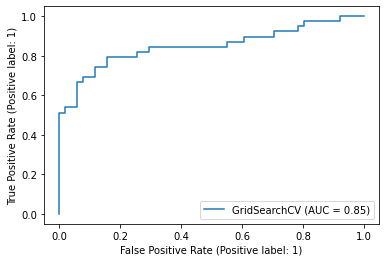

In [61]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(SVC_model,scaled_X_test,y_test)

### Fairly well performance on the SVM.

###### 

In [63]:
#Logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

y_Logistic_reg_model_pred = Logistic_reg_model.predict(scaled_X_test)

confusion_matrix(y_test,y_Logistic_reg_model_pred)

array([[46,  5],
       [14, 25]], dtype=int64)

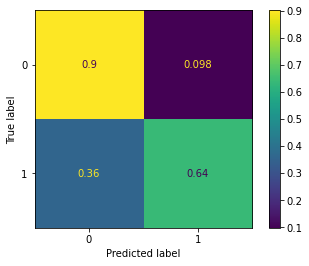

In [64]:
plot_confusion_matrix(Logistic_reg_model,scaled_X_test,y_test,normalize='true')

In [65]:
print(classification_report(y_test,y_Logistic_reg_model_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        51
           1       0.83      0.64      0.72        39

    accuracy                           0.79        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.80      0.79      0.78        90



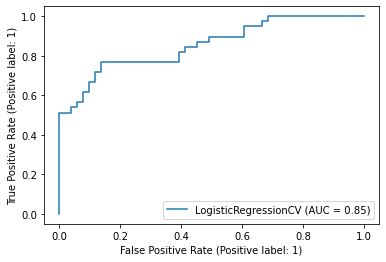

In [66]:
plot_roc_curve(Logistic_reg_model,scaled_X_test,y_test)

### 

In [96]:
#Gradient Boosting
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
predictions = Grad_Boost_model.predict(scaled_X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        51
           1       0.93      0.67      0.78        39

    accuracy                           0.83        90
   macro avg       0.86      0.81      0.82        90
weighted avg       0.85      0.83      0.83        90



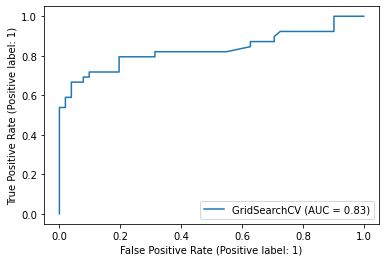

In [97]:
plot_roc_curve(Grad_Boost_model,scaled_X_test,y_test)

###### 

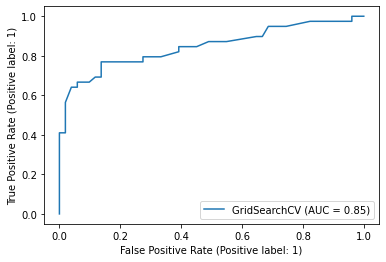

In [102]:
#AdaBoostClassifier
plot_roc_curve(Grad_Boost_model,scaled_X_test,y_test)

###### 

## Deploying the best working model

In [127]:
len(Grad_Boost_model.predict(scaler.transform(df2)))

418

In [120]:
dfuu = pd.read_csv("../Titanic Survival/test.csv")

g = Grad_Boost_model.predict(df2)
s = pd.Series(g)
ss = dfuu['PassengerId']

dfu = pd.concat([ss,s],axis=1)
dfu.rename(columns = {0:'Survived'}, inplace = True)

dfu = dfu.set_index('PassengerId')
dfu

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [121]:
dfu.to_csv('Titanix_model.csv')

In [128]:
from joblib import dump, load
dump(Grad_Boost_model, 'AdaBoost.joblib') 

['AdaBoost.joblib']

In [185]:
from joblib import dump, load
dump(Grad_Boost_model, 'AdaBoost_unscaled.joblib') 

['AdaBoost_unscaled.joblib']

# 

# Thank You!

In [139]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [140]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,38.000000,1,0,71.2833,1.0
2,3,1,26.000000,0,0,7.9250,0.0
3,1,1,35.000000,1,0,53.1000,0.0
4,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0
887,1,1,19.000000,0,0,30.0000,0.0
888,3,1,29.699118,1,2,23.4500,0.0
889,1,0,26.000000,0,0,30.0000,1.0


In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [190]:
inputs=[[1,0,25,0,0,7100.25,1]]

In [191]:
from joblib import dump, load
log_model = load('AdaBoost_unscaled.joblib')
#scaler.fit(inputs)
predictionn = log_model.predict(inputs)
print(predictionn[0])

1


In [163]:
scaler.transform(inputs)

array([[0., 0., 0., 0., 0., 0., 0.]])

In [78]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0
887,1,1,1,19.000000,0,0,30.0000,0.0
888,0,3,1,29.699118,1,2,23.4500,0.0
889,1,1,0,26.000000,0,0,30.0000,1.0


In [76]:
scaled_X_train[2]

array([-1.56832452,  1.34190138, -1.13784647, -0.48348383,  0.74764648,
        3.7474377 , -0.5633852 ])

In [70]:
y_train[1]

1